In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
from itertools import cycle

from matplotlib.cm import get_cmap

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_circles, make_moons

from scipy.stats import pearsonr

%matplotlib inline

In [107]:
colors = cycle(get_cmap('plasma')(np.random.permutation(np.linspace(0, 1, 12))))

## Pearson linear correlation

Im going to generate here different datasets with 2 features. All of them with size n. <br/>

In [102]:
n = 1000
x = np.linspace(0, 1, n)

x1 = x
y1 = x1 + np.random.randn(n) * 0.2

x2 = x
y2 = -x2 + np.random.randn(n) * 0.12

samples, _ = make_circles(n, noise=0.25, factor=0.5)
x3, y3 = samples[:, 0], samples[:, 1]

samples, _ = make_moons(n, noise=0.1)
x4, y4 = samples[:, 0], samples[:, 1]

samples = np.stack([
    np.stack((x1, y1), axis=1),
    np.stack((x2, y2), axis=1),
    np.stack((x3, y3), axis=1),
    np.stack((x4, y4), axis=1)
], axis=2)

The next cell plot all the datasets

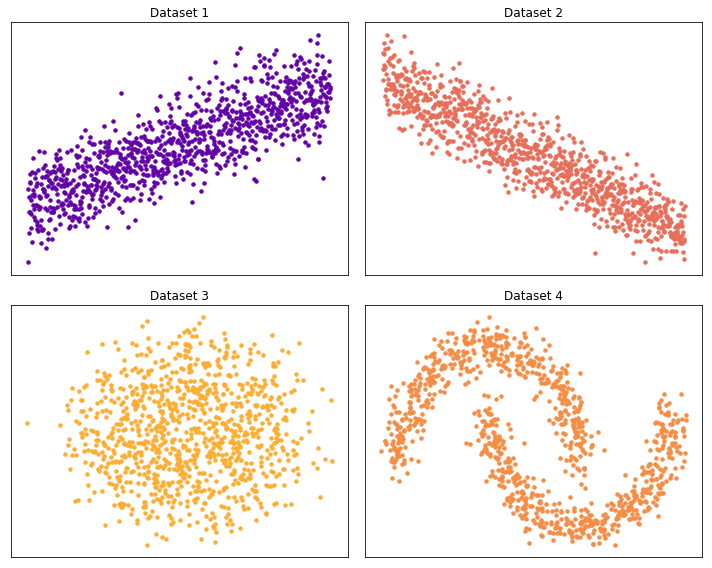

In [115]:
cols = 2
rows = ceil(samples.shape[2] / cols)

fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
for i in range(0, samples.shape[2]):
    plt.sca(ax[i // cols, i % cols])
    plt.scatter(samples[:, 0, i], samples[:, 1, i], color=next(colors), s=12)
    plt.title('Dataset {}'.format(i+1));
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

For each dataset we can compute the pearson correlation coefficient between both features. <br/>
Such value will be in the range [-1, 1]. <br/>
If this value moves to -1, it means that as x increases, y decreases or viceversa <br/>
If its close to 1, x and y both decrease or increase <br/>
And if its 0, there is no linear correlation between such features <br/>
http://www.statsoft.com/Textbook/Statistics-Glossary/P/button/p#Pearson%20Correlation

In [128]:
results = np.array([pearsonr(samples[:, 0, i], samples[:, 1, i]) for i in range(0, samples.shape[2])])
results = results.round(5)
coeffs, p = results[:, 0], results[:, 1]

pd.DataFrame(results, columns=['Pearson coefficient', 'p-value'],
             index=['Dataset {}'.format(i+1) for i in range(0, samples.shape[2])])

,Pearson coefficient,p-value
Dataset 1,0.82014,0.00000
Dataset 2,-0.92154,0.00000
Dataset 3,0.02578,0.41545
Dataset 4,-0.44644,0.00000


The next graph shows the datasets and a line which tries to fit to the points the best as possible. <br/>
You can check the relation between the line slope & the pearson coefficient

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(x.reshape([-1, 1]), y)

x2 = np.linspace(0, 1.5, 50)
y2 = model.predict(x2.reshape([-1, 1]))

plt.plot(x2, y2, color='red', linewidth=3)

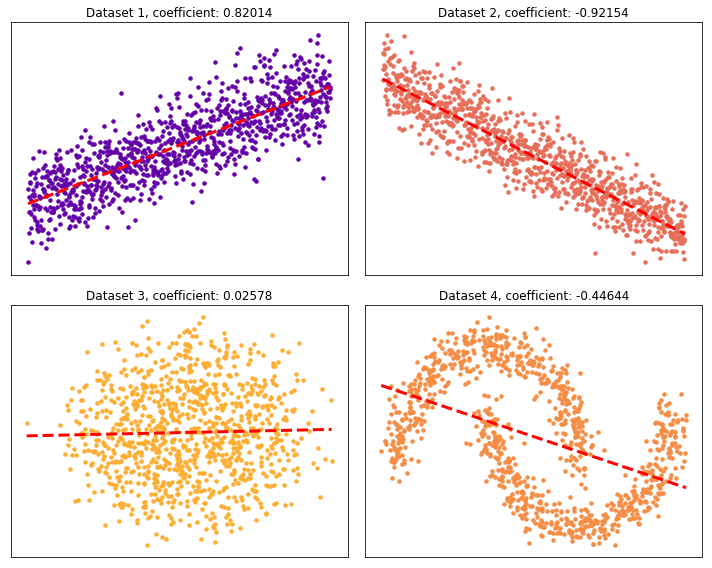

In [140]:
def line(x, y):
    model = LinearRegression(fit_intercept=True)
    model.fit(x.reshape([-1, 1]), y)
    
    xl = np.linspace(x.min(), x.max(), 3)
    yl = model.predict(xl.reshape([-1, 1]))
    return xl, yl

cols = 2
rows = ceil(samples.shape[2] / cols)

fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
for i in range(0, samples.shape[2]):
    plt.sca(ax[i // cols, i % cols])
    
    x, y = samples[:, 0, i], samples[:, 1, i]
    plt.scatter(x, y, color=next(colors), s=12)
    xl, yl = line(x, y)
    plt.plot(xl, yl, color='red', linewidth=3, linestyle='--')
    
    plt.title('Dataset {}, coefficient: {}'.format(i+1, coeffs[i]));
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()